## <span style="color:blue">  Numerical exercises 11</span>


## 11.1 - Linear fit

In [4]:
#libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

In [5]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [6]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

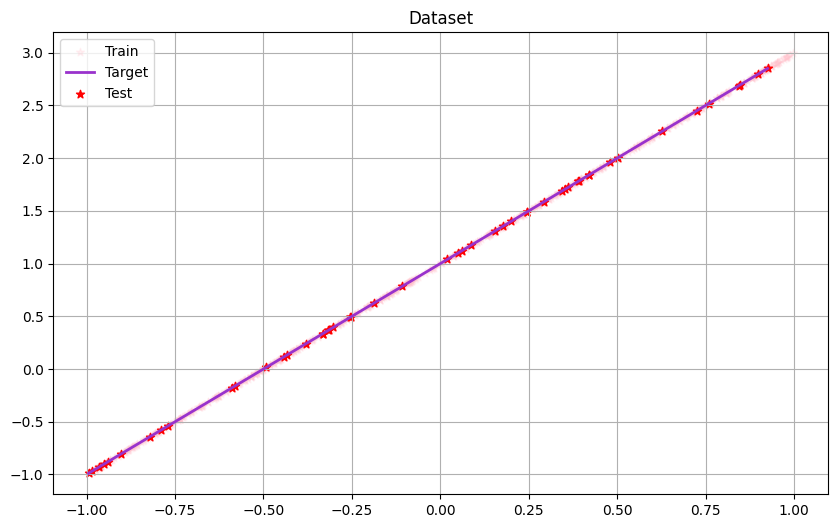

In [9]:
# plot training and target dataset
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='pink', marker='*', alpha=0.2, label='Train')
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2')
plt.scatter(x_valid, y_valid, color='red', marker='*', label='Test')
plt.title("Dataset")
plt.legend()
plt.grid(True)
plt.show()

## 11.1 - Linear regression

In order to have two parameters to optimize (slope $m$ and intersect $b$) we just need a single neuron in a single hidden layer.

In [10]:
# compose the NN model
model = tf.keras.Sequential() ##empty sequential model
model.add(Dense(1, input_shape=(1,))) ##adds a layer (1 out, 1 in)

# compile the model choosing optimizer ( stochastic gradient descend), loss (cost function) and metrics objects (checks mse during training)
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# prints a summary of our composed model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0534 - mse: 3.0534 - val_loss: 2.0429 - val_mse: 2.0429
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1455 - mse: 2.1455 - val_loss: 1.5258 - val_mse: 1.5258
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6215 - mse: 1.6215 - val_loss: 1.1698 - val_mse: 1.1698
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2936 - mse: 1.2936 - val_loss: 0.9130 - val_mse: 0.9130
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9708 - mse: 0.9708 - val_loss: 0.7202 - val_mse: 0.7202
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7517 - mse: 0.7517 - val_loss: 0.5725 - val_mse: 0.5725
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.4579 - val_mse: 0.4579
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5122 - mse: 0.5122 - val_loss: 0.3672 - val_mse: 0.3672
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4007 - mse:

In [12]:
# return weights and biases
model.get_weights()

[array([[1.9022752]], dtype=float32), array([0.99883497], dtype=float32)]

In [14]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)


# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print()
print('Exact loss:', score[0])
print('Exact accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0030 - mse: 0.0030
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030 - mse: 0.0030

Test loss: 0.0030358685180544853
Test accuracy: 0.0030358685180544853

Exact loss: 0.0030358685180544853
Exact accuracy: 0.0030358685180544853


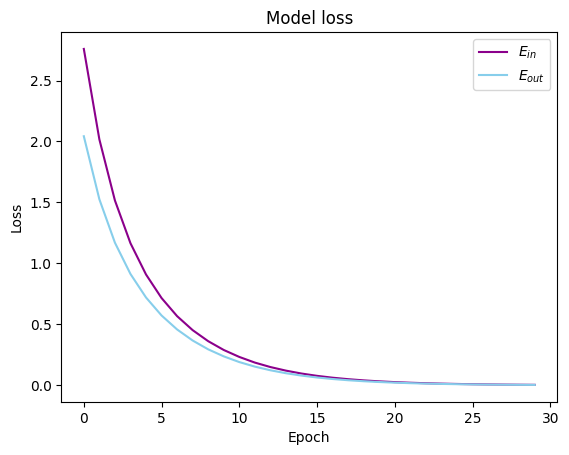

In [15]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], color='darkmagenta')
plt.plot(history.history['val_loss'], color='skyblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$E_{in}$', '$E_{out}$'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


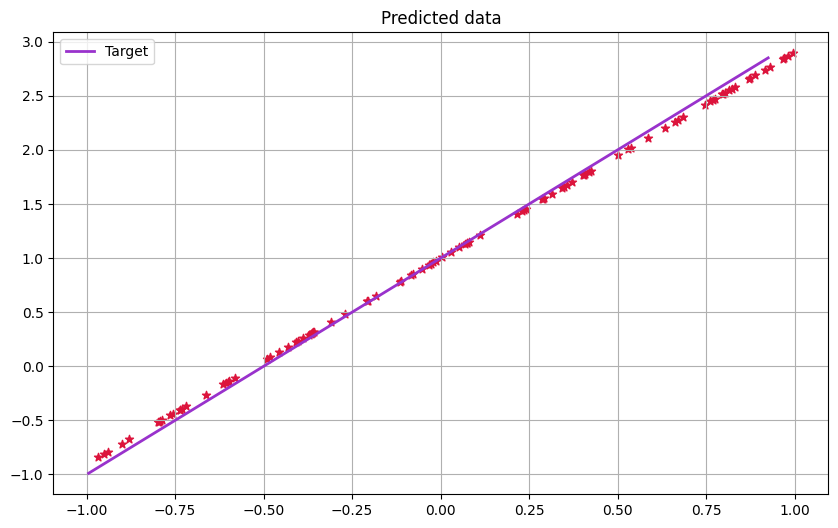

In [17]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(10, 6))
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2')
plt.scatter(x_predicted, y_predicted, color='crimson', marker='*')
plt.title("Predicted data")
plt.legend()
plt.grid(True)
plt.show()

### Varying the number of epochs

#### epoch 100

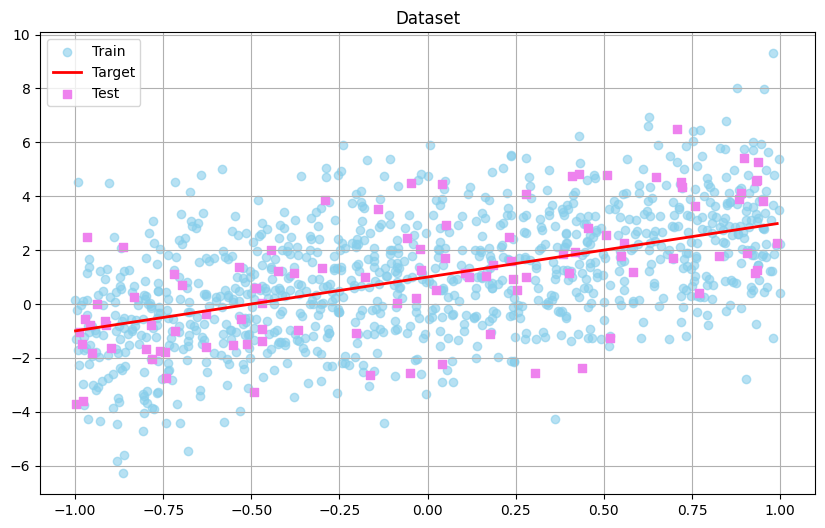

In [17]:
#parameters of f(x) = m*x + b
m = 2 #slope
b = 1 #intersect

#generate trainings and test inputs
np.random.seed(0)
n_valid = 100
x_train = np.random.uniform(-1, 1, n_valid*10)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target = m * x_valid + b #target linear function

sigma = 2
y_train = np.random.normal(m * x_train + b, sigma) #actual measures 
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='skyblue', marker='o', alpha=0.6, label='Train')
plt.plot(x_valid, y_target, color='red', label="Target", linewidth=2)
plt.scatter(x_valid, y_valid, color='violet', marker='s', label='Test') 
plt.title("Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# summary of our composed model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4361 - mse: 1.4361 - val_loss: 0.9573 - val_mse: 0.9573
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0399 - mse: 1.0399 - val_loss: 0.6416 - val_mse: 0.6416
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6904 - mse: 0.6904 - val_loss: 0.4491 - val_mse: 0.4491
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4621 - mse: 0.4621 - val_loss: 0.3276 - val_mse: 0.3276
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3475 - mse: 0.3475 - val_loss: 0.2467 - val_mse: 0.2467
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2467 - mse: 0.2467 - val_loss: 0.1891 - val_mse: 0.1891
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1966 - mse: 0.1966 - val_loss: 0.1481 - val_mse: 0.1481
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1633 - mse: 0.1633 - val_loss: 0.1170 - val_mse: 0.1170
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.11

In [21]:
# return weights
optm, optb = model.get_weights()
print("Optimized m = ", optm[0][0])
print("Optimized b = ", optb[0])

Optimized m =  1.9999738
Optimized b =  0.9999997


In [22]:
# evaluate model
score1 = model.evaluate(x_valid, y_valid, batch_size=32, verbose=2)
# evaluate model with the exact curve
score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=2)

2/2 - 0s - 17ms/step - loss: 2.1886e-10 - mse: 2.1886e-10
2/2 - 0s - 14ms/step - loss: 2.1886e-10 - mse: 2.1886e-10


In [23]:
# print performance
print()
print('"Test" loss:', score1[0])
print('"Test" accuracy:', score1[1])

print()
print('"Exact" loss:', score2[0])
print('"Exact" accuracy:', score2[1])


"Test" loss: 2.1885729339921056e-10
"Test" accuracy: 2.1885729339921056e-10

"Exact" loss: 2.1885729339921056e-10
"Exact" accuracy: 2.1885729339921056e-10


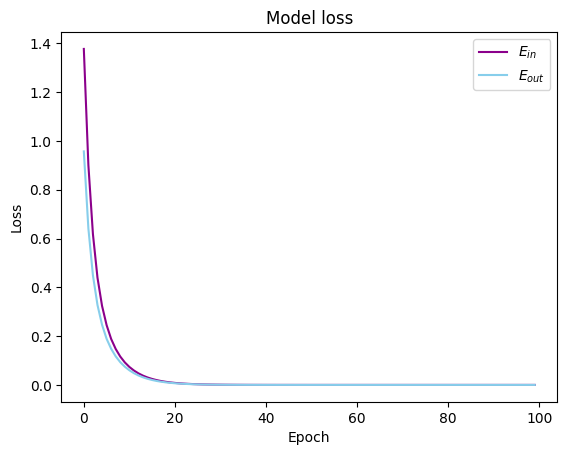

In [25]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], color='darkmagenta')
plt.plot(history.history['val_loss'], color='skyblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$E_{in}$', '$E_{out}$'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


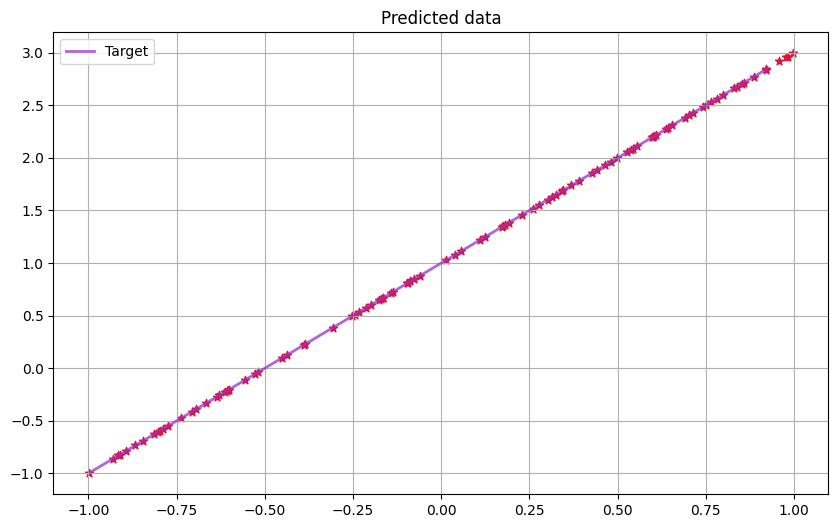

In [27]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(10, 6))
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.scatter(x_predicted, y_predicted, color='crimson', marker='*')
plt.title("Predicted data")
plt.legend()
plt.grid(True)
plt.show()

#### epoch 5

In [28]:
# Compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# summary of our composed model
model.summary()

/home/fefe/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=5,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=1)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1832 - mse: 2.1832 - val_loss: 1.4340 - val_mse: 1.4340
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2874 - mse: 1.2874 - val_loss: 1.0281 - val_mse: 1.0281
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0088 - mse: 1.0088 - val_loss: 0.7661 - val_mse: 0.7661
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8739 - mse: 0.8739 - val_loss: 0.5864 - val_mse: 0.5864
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6492 - mse: 0.6492 - val_loss: 0.4559 - val_mse: 0.4559


In [30]:
# return weights
optm, optb = model.get_weights()
print("Optimized m = ", optm[0][0])
print("Optimized b = ", optb[0])

Optimized m =  0.8279553
Optimized b =  0.7920254


In [31]:
score1 = model.evaluate(x_valid, y_valid, batch_size=32, verbose=2)
# evaluate model with the exact curve
score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=2)

2/2 - 0s - 15ms/step - loss: 0.4559 - mse: 0.4559
2/2 - 0s - 16ms/step - loss: 0.4559 - mse: 0.4559


In [32]:
# print performance
print()
print('"Test" loss:', score1[0])
print('"Test" accuracy:', score1[1])

print()
print('"Exact" loss:', score2[0])
print('"Exact" accuracy:', score2[1])


"Test" loss: 0.4559304714202881
"Test" accuracy: 0.4559304714202881

"Exact" loss: 0.4559304714202881
"Exact" accuracy: 0.4559304714202881


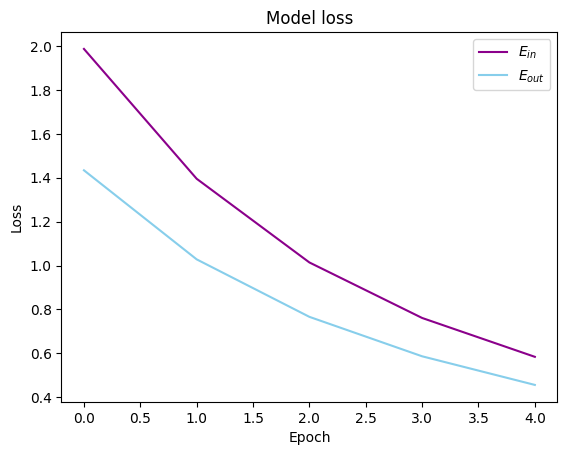

In [33]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], color='darkmagenta')
plt.plot(history.history['val_loss'], color='skyblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$E_{in}$', '$E_{out}$'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


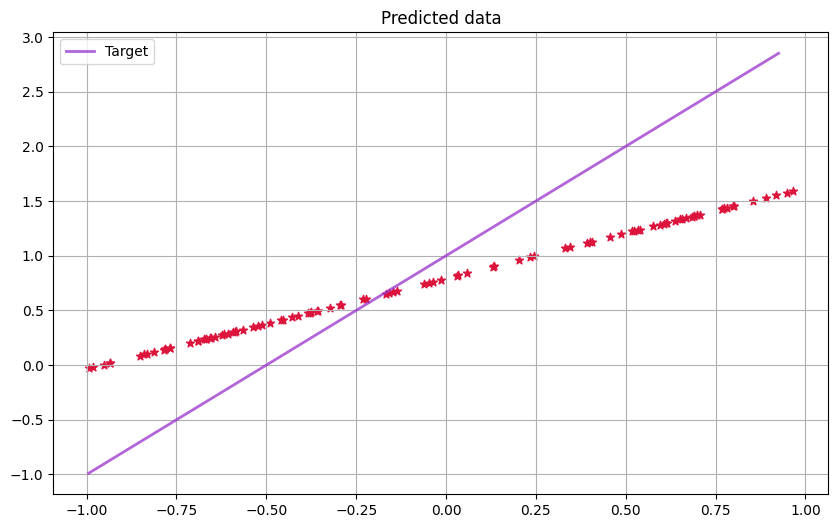

In [34]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(10, 6))
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.scatter(x_predicted, y_predicted, color='crimson', marker='*')
plt.title("Predicted data")
plt.legend()
plt.grid(True)
plt.show()

### Varying $N_{train}$ and $N_{valid}$

#### $N_{train}=100$ $N_{valid}=10$

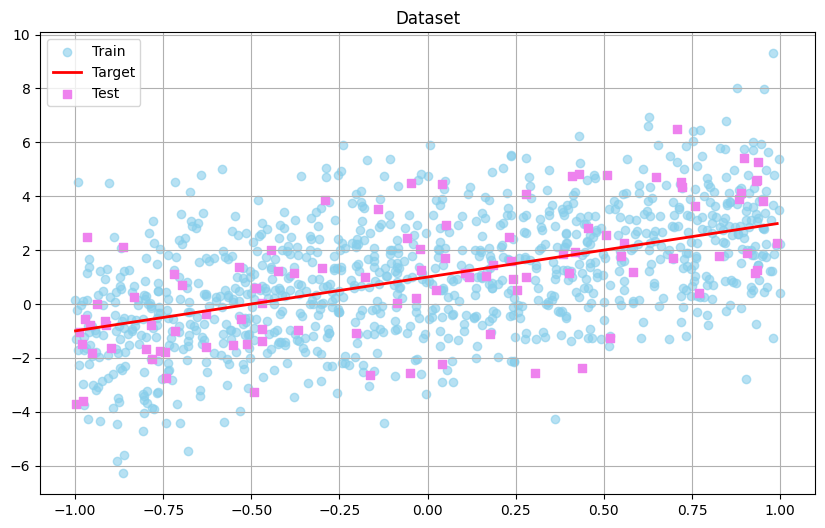

In [36]:
#parameters of f(x) = m*x + b
m = 2 #slope
b = 1 #intersect

#generate trainings and test inputs
np.random.seed(0)
n_valid = 100
x_train = np.random.uniform(-1, 1, n_valid*10)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target = m * x_valid + b #target linear function

sigma = 2
y_train = np.random.normal(m * x_train + b, sigma) #actual measures 
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='skyblue', marker='o', alpha=0.6, label='Train')
plt.plot(x_valid, y_target, color='red', label="Target", linewidth=2)
plt.scatter(x_valid, y_valid, color='violet', marker='s', label='Test') 
plt.title("Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# summary of our composed model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8982 - mse: 7.8982 - val_loss: 6.9356 - val_mse: 6.9356
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5993 - mse: 6.5993 - val_loss: 5.7208 - val_mse: 5.7208
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1829 - mse: 5.1829 - val_loss: 4.9539 - val_mse: 4.9539
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7066 - mse: 4.7066 - val_loss: 4.4417 - val_mse: 4.4417
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3118 - mse: 4.3118 - val_loss: 4.1067 - val_mse: 4.1067
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3741 - mse: 4.3741 - val_loss: 3.8647 - val_mse: 3.8647
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0066 - mse: 4.0066 - val_loss: 3.7119 - val_mse: 3.7119
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9543 - mse: 3.9543 - val_loss: 3.5973 - val_mse: 3.5973
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.783

In [39]:
# return weights
optm, optb = model.get_weights()
print("Optimized m = ", optm[0][0])
print("Optimized b = ", optb[0])

Optimized m =  1.992663
Optimized b =  1.0342482


In [40]:
score1 = model.evaluate(x_valid, y_valid, batch_size=32, verbose=2)
# evaluate model with the exact curve
score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=2)

4/4 - 0s - 8ms/step - loss: 3.2909 - mse: 3.2909
4/4 - 0s - 9ms/step - loss: 0.0012 - mse: 0.0012


In [41]:
# print performance
print()
print('"Test" loss:', score1[0])
print('"Test" accuracy:', score1[1])

print()
print('"Exact" loss:', score2[0])
print('"Exact" accuracy:', score2[1])


"Test" loss: 3.2908687591552734
"Test" accuracy: 3.2908687591552734

"Exact" loss: 0.0012134502176195383
"Exact" accuracy: 0.0012134502176195383


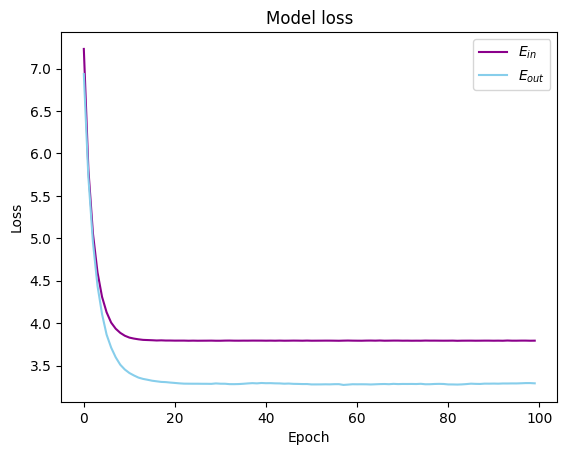

In [42]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], color='darkmagenta')
plt.plot(history.history['val_loss'], color='skyblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$E_{in}$', '$E_{out}$'], loc='best')
plt.show()

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f3dac545000> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


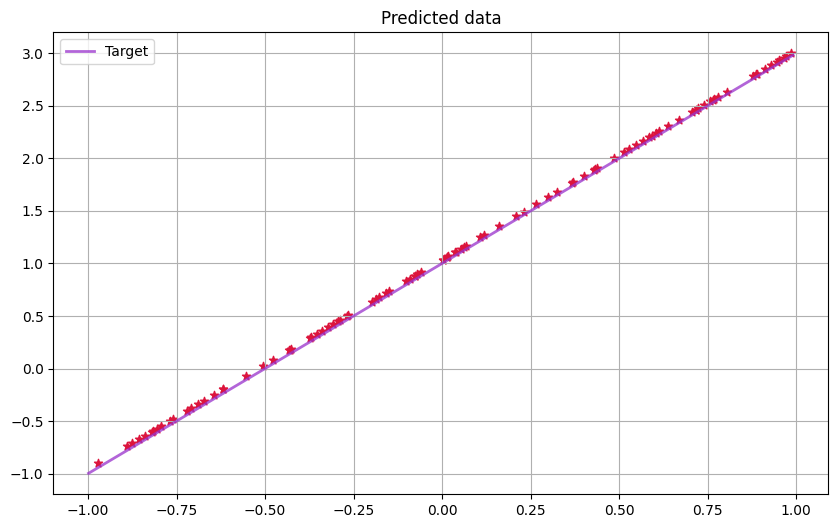

In [43]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(10, 6))
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.scatter(x_predicted, y_predicted, color='crimson', marker='*')
plt.title("Predicted data")
plt.legend()
plt.grid(True)
plt.show()

#### $N_{train}=3000$ $N_{valid}=300$

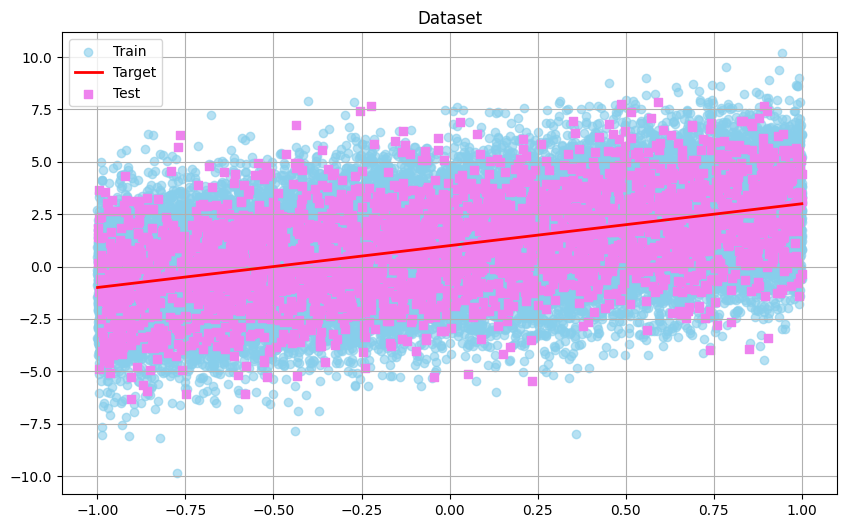

In [44]:
#parameters of f(x) = m*x + b
m = 2 #slope
b = 1 #intersect

#generate trainings and test inputs
np.random.seed(0)
n_valid = 3000
x_train = np.random.uniform(-1, 1, n_valid*10)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target = m * x_valid + b #target linear function

sigma = 2
y_train = np.random.normal(m * x_train + b, sigma) #actual measures 
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='skyblue', marker='o', alpha=0.6, label='Train')
plt.plot(x_valid, y_target, color='red', label="Target", linewidth=2)
plt.scatter(x_valid, y_valid, color='violet', marker='s', label='Test') 
plt.title("Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# summary of our composed model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=1)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.9624 - mse: 4.9624 - val_loss: 4.0271 - val_mse: 4.0271
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.0218 - mse: 4.0218 - val_loss: 4.0255 - val_mse: 4.0255
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.9708 - mse: 3.9708 - val_loss: 4.0277 - val_mse: 4.0277
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.9886 - mse: 3.9886 - val_loss: 4.0247 - val_mse: 4.0247
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.9536 - mse: 3.9536 - val_loss: 4.0262 - val_mse: 4.0262
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.0640 - mse: 4.0640 - val_loss: 4.0240 - val_mse: 4.0240
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.0250 - mse: 4.0250 - val_loss: 4.0283 - val_mse: 4.0283
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.9570 - mse: 3.9570 - val_loss: 4.0307 - val_mse: 4.0307
Epoch 9/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

In [47]:
# return weights
optm, optb = model.get_weights()
print("Optimized m = ", optm[0][0])
print("Optimized b = ", optb[0])

Optimized m =  2.0258613
Optimized b =  0.9586808


In [48]:
score1 = model.evaluate(x_valid, y_valid, batch_size=32, verbose=2)
# evaluate model with the exact curve
score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=2)

94/94 - 0s - 1ms/step - loss: 4.0255 - mse: 4.0255
94/94 - 0s - 1ms/step - loss: 0.0019 - mse: 0.0019


In [49]:
# print performance
print()
print('"Test" loss:', score1[0])
print('"Test" accuracy:', score1[1])

print()
print('"Exact" loss:', score2[0])
print('"Exact" accuracy:', score2[1])


"Test" loss: 4.025528430938721
"Test" accuracy: 4.025528430938721

"Exact" loss: 0.0019472942221909761
"Exact" accuracy: 0.0019472942221909761


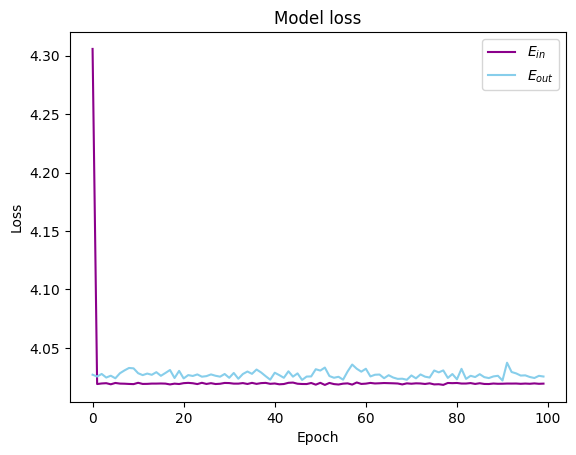

In [50]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], color='darkmagenta')
plt.plot(history.history['val_loss'], color='skyblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$E_{in}$', '$E_{out}$'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


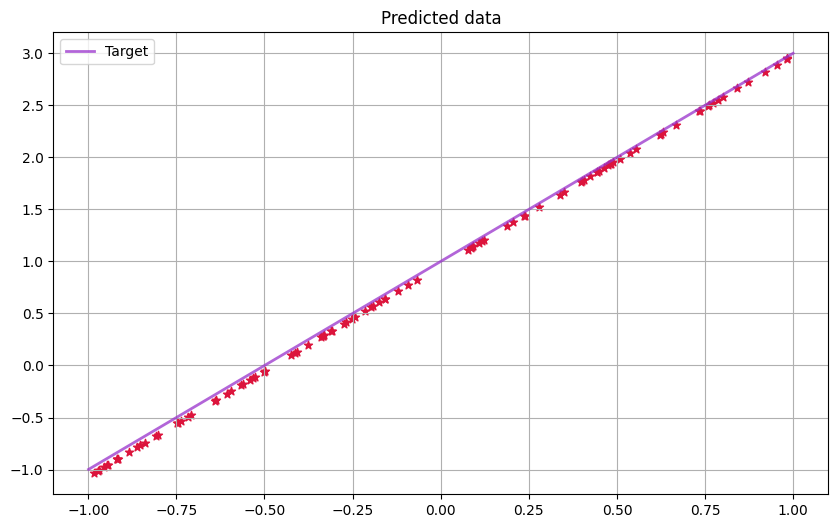

In [51]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(10, 6))
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.scatter(x_predicted, y_predicted, color='crimson', marker='*')
plt.title("Predicted data")
plt.legend()
plt.grid(True)
plt.show()

### Varying $\sigma$

### $\sigma = 0.01$

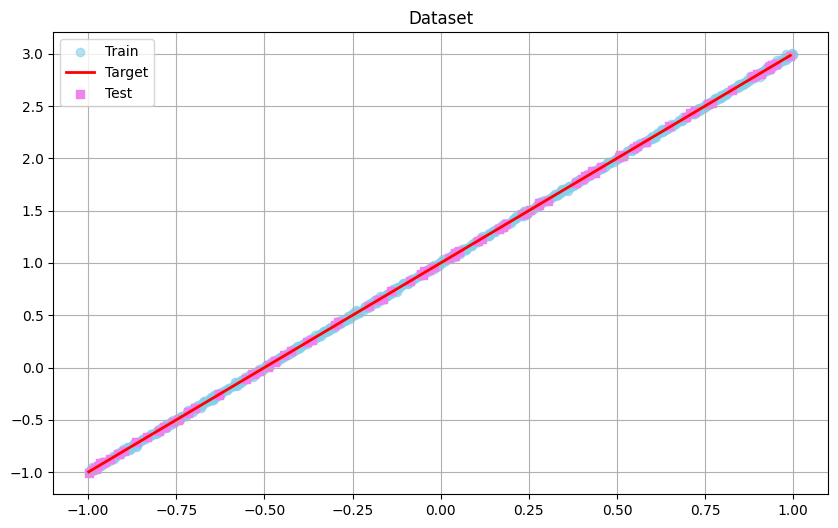

In [52]:
#parameters of f(x) = m*x + b
m = 2 #slope
b = 1 #intersect

#generate trainings and test inputs
np.random.seed(0)
n_valid = 100
x_train = np.random.uniform(-1, 1, n_valid*10)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target = m * x_valid + b #target linear function

sigma = 0.01
y_train = np.random.normal(m * x_train + b, sigma) #actual measures 
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='skyblue', marker='o', alpha=0.6, label='Train')
plt.plot(x_valid, y_target, color='red', label="Target", linewidth=2)
plt.scatter(x_valid, y_valid, color='violet', marker='s', label='Test') 
plt.title("Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# summary of our composed model
model.summary()

/home/fefe/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3266 - mse: 1.3266 - val_loss: 0.7633 - val_mse: 0.7633
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6082 - mse: 0.6082 - val_loss: 0.4103 - val_mse: 0.4103
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3322 - mse: 0.3322 - val_loss: 0.2420 - val_mse: 0.2420
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1963 - mse: 0.1963 - val_loss: 0.1509 - val_mse: 0.1509
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.0962 - val_mse: 0.0962
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0747 - mse: 0.0747 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0477 - mse: 0.0477 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.019

In [55]:
# return weights
optm, optb = model.get_weights()
print("Optimized m = ", optm[0][0])
print("Optimized b = ", optb[0])

Optimized m =  2.000068
Optimized b =  1.0001762


In [56]:
score1 = model.evaluate(x_valid, y_valid, batch_size=32, verbose=2)
# evaluate model with the exact curve
score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=2)

4/4 - 0s - 9ms/step - loss: 8.2097e-05 - mse: 8.2097e-05
4/4 - 0s - 10ms/step - loss: 3.1901e-08 - mse: 3.1901e-08


In [57]:
# print performance
print()
print('"Test" loss:', score1[0])
print('"Test" accuracy:', score1[1])

print()
print('"Exact" loss:', score2[0])
print('"Exact" accuracy:', score2[1])


"Test" loss: 8.209651423385367e-05
"Test" accuracy: 8.209651423385367e-05

"Exact" loss: 3.1901219443852824e-08
"Exact" accuracy: 3.1901219443852824e-08


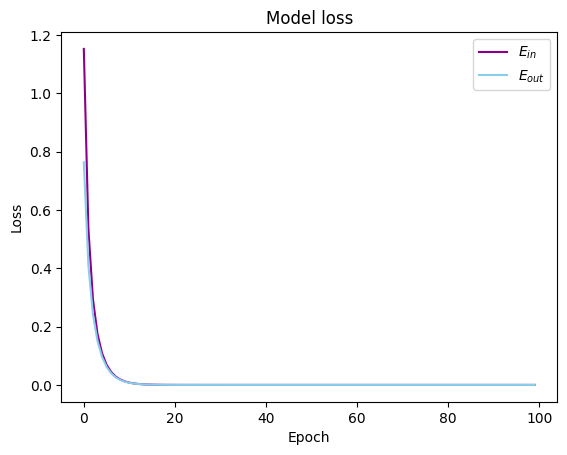

In [58]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], color='darkmagenta')
plt.plot(history.history['val_loss'], color='skyblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$E_{in}$', '$E_{out}$'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


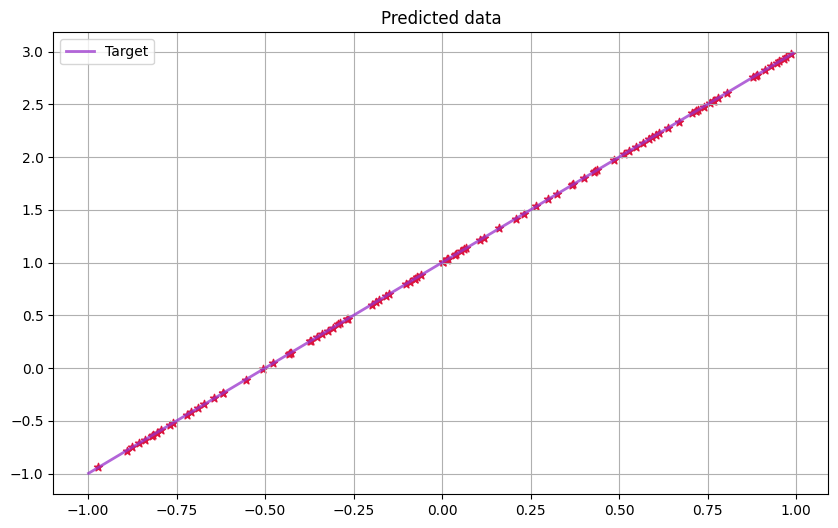

In [59]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(10, 6))
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.scatter(x_predicted, y_predicted, color='crimson', marker='*')
plt.title("Predicted data")
plt.legend()
plt.grid(True)
plt.show()

### $\sigma = 2.5$


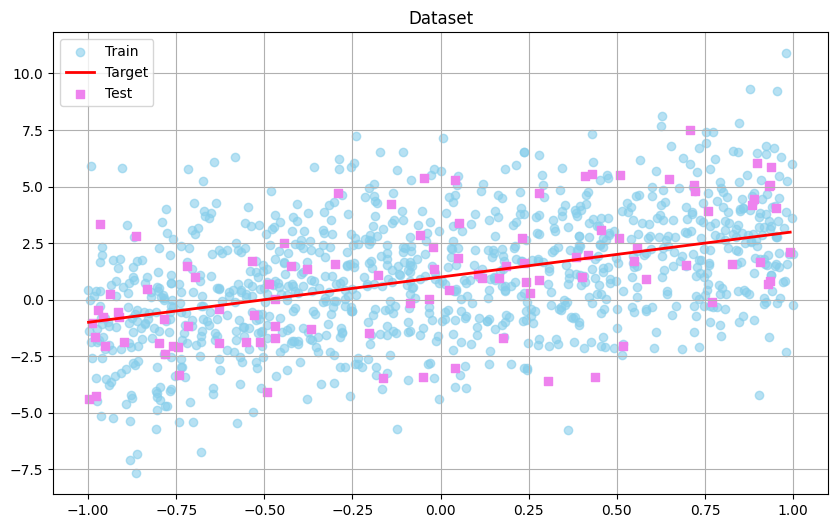

In [60]:
#parameters of f(x) = m*x + b
m = 2 #slope
b = 1 #intersect

#generate trainings and test inputs
np.random.seed(0)
n_valid = 100
x_train = np.random.uniform(-1, 1, n_valid*10)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target = m * x_valid + b #target linear function

sigma = 2.5
y_train = np.random.normal(m * x_train + b, sigma) #actual measures 
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='skyblue', marker='o', alpha=0.6, label='Train')
plt.plot(x_valid, y_target, color='red', label="Target", linewidth=2)
plt.scatter(x_valid, y_valid, color='violet', marker='s', label='Test') 
plt.title("Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [61]:
# Compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# summary of our composed model
model.summary()

/home/fefe/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.3322 - mse: 11.3322 - val_loss: 10.0671 - val_mse: 10.0671
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7253 - mse: 8.7253 - val_loss: 8.4133 - val_mse: 8.4133
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5365 - mse: 7.5365 - val_loss: 7.3941 - val_mse: 7.3941
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3500 - mse: 7.3500 - val_loss: 6.7001 - val_mse: 6.7001
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2632 - mse: 6.2632 - val_loss: 6.2480 - val_mse: 6.2480
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4387 - mse: 6.4387 - val_loss: 5.9345 - val_mse: 5.9345
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9581 - mse: 5.9581 - val_loss: 5.7160 - val_mse: 5.7160
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9538 - mse: 5.9538 - val_loss: 5.5609 - val_mse: 5.5609
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6

In [63]:
# return weights
optm, optb = model.get_weights()
print("Optimized m = ", optm[0][0])
print("Optimized b = ", optb[0])

Optimized m =  2.0417178
Optimized b =  1.078163


In [64]:
score1 = model.evaluate(x_valid, y_valid, batch_size=32, verbose=2)
# evaluate model with the exact curve
score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=2)

4/4 - 0s - 8ms/step - loss: 5.1200 - mse: 5.1200
4/4 - 0s - 9ms/step - loss: 0.0065 - mse: 0.0065


In [65]:
# print performance
print()
print('"Test" loss:', score1[0])
print('"Test" accuracy:', score1[1])

print()
print('"Exact" loss:', score2[0])
print('"Exact" accuracy:', score2[1])


"Test" loss: 5.1200337409973145
"Test" accuracy: 5.1200337409973145

"Exact" loss: 0.006529874633997679
"Exact" accuracy: 0.006529874633997679


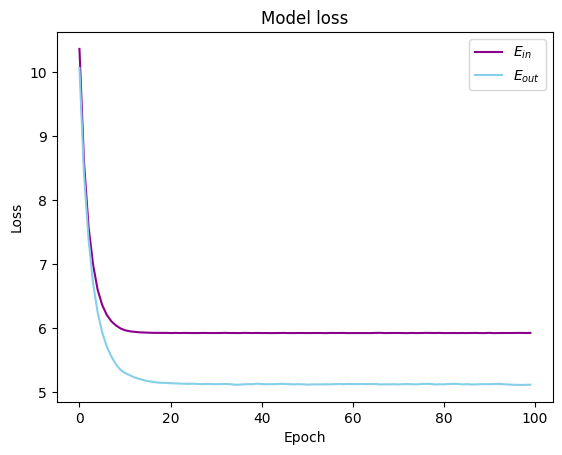

In [66]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], color='darkmagenta')
plt.plot(history.history['val_loss'], color='skyblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$E_{in}$', '$E_{out}$'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


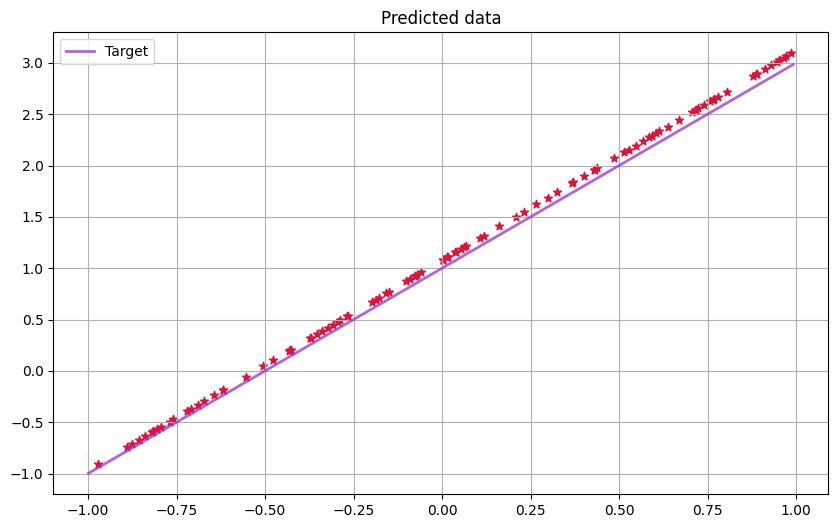

In [67]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(10, 6))
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.scatter(x_predicted, y_predicted, color='crimson', marker='*')
plt.title("Predicted data")
plt.legend()
plt.grid(True)
plt.show()